In [31]:
import os
import glob
from patchify import patchify, unpatchify
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import numpy as np
import imageio
import pandas as pd
import matplotlib.colors as mcolors


In [25]:
class GlobalConfig:
    def __init__(self):
        self.images = '../data/raw/AneRBC-I/Anemic_individuals/Original_images'
        self.masks = '../data/raw/AneRBC-I/Anemic_individuals/Binary_segmented'

config = GlobalConfig()

In [26]:
# Get sorted list of image and mask file paths
image_files = sorted(glob.glob(os.path.join(config.images, "*.png")))
mask_files = sorted(glob.glob(os.path.join(config.masks, "*.png")))

# Load, resize, and stack images
large_images = np.stack([
    np.array(Image.open(img).convert("L"))  # Grayscale
    for img in image_files
])

large_masks = np.stack([
    np.array(Image.open(mask).convert("L"))  # Grayscale
    for mask in mask_files
])

print(f"Loaded {large_images.shape[0]} images of shape {large_images.shape[1:]}")  # (num_images, H, W)
print(f"Loaded {large_masks.shape[0]} masks of shape {large_masks.shape[1:]}")  # (num_masks, H, W)

Loaded 500 images of shape (960, 1224)
Loaded 500 masks of shape (960, 1224)


## Generate Image and Mask Patches

In [24]:
os.makedirs('../data/processed/AneRBC-I/Anemic_individuals/image_patches', exist_ok=True)
os.makedirs('../data/processed/AneRBC-I/Anemic_individuals/mask_patches', exist_ok=True)

patch_size = (120, 153)

for img in range(large_images.shape[0]):
    large_image = large_images[img]
    patches = patchify(large_image, patch_size, step=patch_size)  # Step = patch size ensures non-overlapping patches

    for i in range(patches.shape[0]):  # 8
        for j in range(patches.shape[1]):  # 8
            patch = patches[i, j, :, :]
            image_filename = f'../data/processed/AneRBC-I/Anemic_individuals/image_patches/image_{img}_patch_{i}_{j}.png'
            imageio.imwrite(image_filename, np.array(patch))

In [28]:
for mask in range(large_masks.shape[0]):
    large_mask = large_masks[mask]
    patches = patchify(large_mask, patch_size, step=patch_size)  # Step = patch size ensures non-overlapping patches

    for i in range(patches.shape[0]):  # 8
        for j in range(patches.shape[1]):  # 8
            patch = patches[i, j, :, :]
            mask_filename = f'../data/processed/AneRBC-I/Anemic_individuals/mask_patches/mask_{mask}_patch_{i}_{j}.png'
            imageio.imwrite(mask_filename, np.array(patch))

# Testing Patchify

In [15]:
# Sample image of size 1224 x 960
image = large_images[0]

# Define patch size
patch_size = (120, 153)

# Extract patches
patches = patchify(image, patch_size, step=patch_size)  # Step = patch size ensures non-overlapping patches

# Reshape patches into a list for easier handling
all_patches = []
for i in range(patches.shape[0]):  # 8
    for j in range(patches.shape[1]):  # 8
        patch = patches[i, j, :, :]
        all_patches.append(patch)

patches_array = np.array(all_patches)  # Shape: (64, 153, 120)

print(f"Extracted {patches_array.shape[0]} patches of shape {patches_array.shape[1:]}")  # Should print (64, 153, 120)


Extracted 64 patches of shape (120, 153)


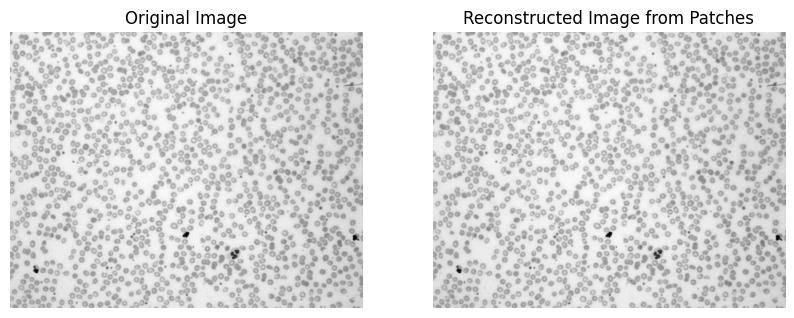

In [16]:
# Reconstruct the image
reconstructed_image = unpatchify(patches, image.shape)

# Plot the original and reconstructed images
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(reconstructed_image, cmap='gray')
ax[1].set_title("Reconstructed Image from Patches")
ax[1].axis("off")

plt.show()
